# Context Diagrams Extension

We have an extension that visualizes contexts of Capella objects. The viewpoint
definiton depends on the object type. The extension is external to
`capellambse` library and needs to be installed separately. You may use the
below command to install it or find more guidance in the [package
documentation](https://dsd-dbs.github.io/capellambse-context-diagrams/).

In [1]:
!pip install -q capellambse_context_diagrams

Now that the lib is installed we can load a test model

In [2]:
from IPython.display import HTML, display  # we'll need that later

import capellambse

path_to_model = "../../../tests/data/melodymodel/5_2/Melody Model Test.aird"
model = capellambse.MelodyModel(path_to_model)

## Logical Component Context

and now as the model is loaded lets have a look at a context diagram for the `School` component

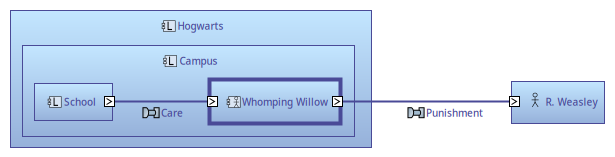

In [3]:
cmp = model.la.all_components.by_name("Whomping Willow")
cmp.context_diagram

## Component Exchange Context

We also found it useful to spell-out the `ComponentExchange`s - this gives us a nice overview of functional interactions between the components

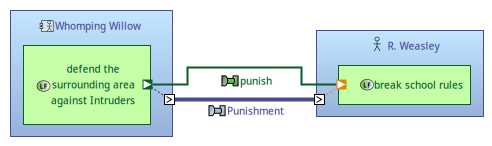

In [4]:
cmp.related_exchanges.by_name("Punishment").context_diagram

it also works for more complex arrangements but we dont have one in the current test model ;-)

## Functional (dataflow) Context

same applies for functions - we saw it useful to see what functions are dependent on an output of a function of interest and what inputs it needs to do what it should. We frequently use that view in documentation

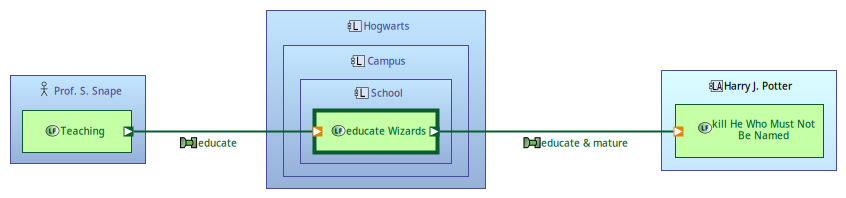

In [5]:
fnc = model.la.all_functions.by_name("educate Wizards")
fnc.context_diagram

## Layers, other than LA

Other layers are supported too - for complete list see https://capellambse-context-diagrams.readthedocs.io/#features

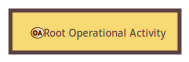

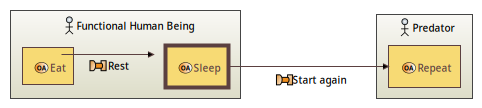

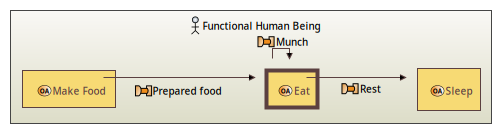

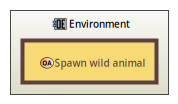

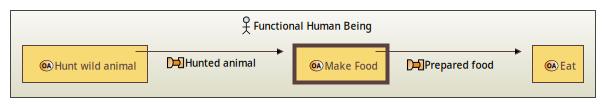

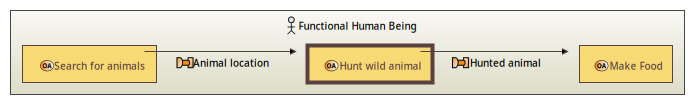

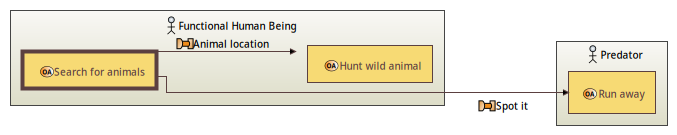

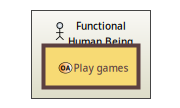

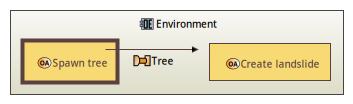

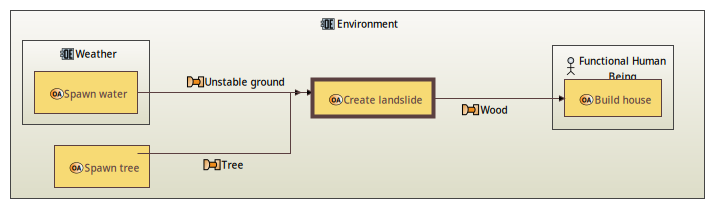

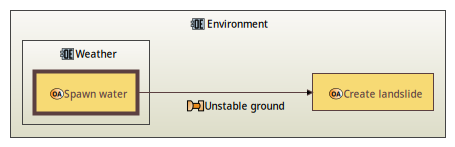

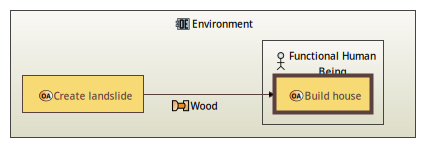

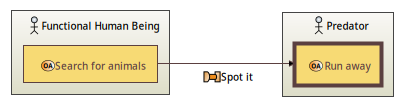

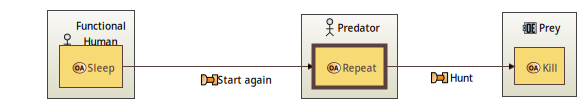

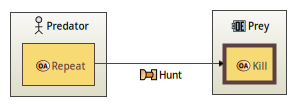

In [6]:
for act in model.oa.all_activities:
    display(HTML(f"<h3>Context of {act.name}</h3>"))
    display(act.context_diagram)

## Customizing context views

For almost every context view you can do some tuning. Just like in Capella itself you can apply view filters, like hide or show exchange items instead or next to exchange names. You can see more of the tuning options here: https://capellambse-context-diagrams.readthedocs.io/en/stable/extras/filters

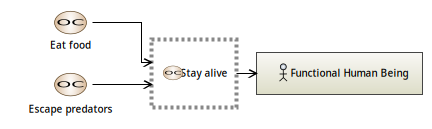

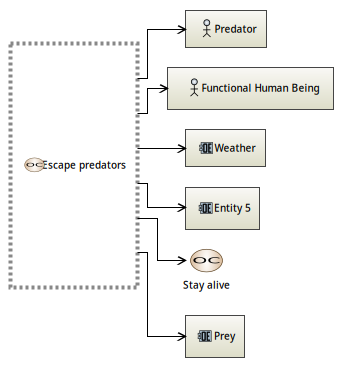

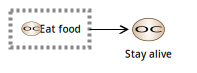

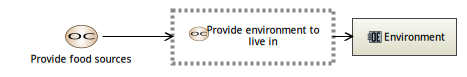

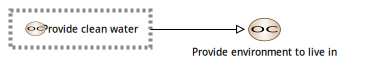

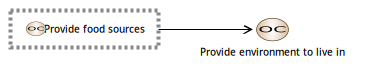

In [7]:
for cap in model.oa.all_capabilities:
    display(HTML(f"<h3>Context of {cap.name}</h3>"))
    diag = cap.context_diagram
    diag.display_symbols_as_boxes = True
    diag.render(None, no_edgelabels=True)
    display(diag)